## 10.2.1. Installing Required Libraries

In [1]:
# pip install scikit-learn
# pip install numpy
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install nltk
# pip install regex
# pip install wordcloud

## 10.2.2. Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

## 10.2.3. Importing the Dataset

In [3]:
# https://www.kaggle.com/karthickveerakumar/spam-filter?select=emails.csv
data_path = "E:\Scikit-Learn-Specialization\Datasets and Source Codes\emails.csv"

#reading the CSV dataset file
message_dataset = pd.read_csv(data_path, engine='python')

#printing the dataset header
message_dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
#printing dataset shape
message_dataset.shape

(5728, 2)

## 10.2.4. Data Visualization

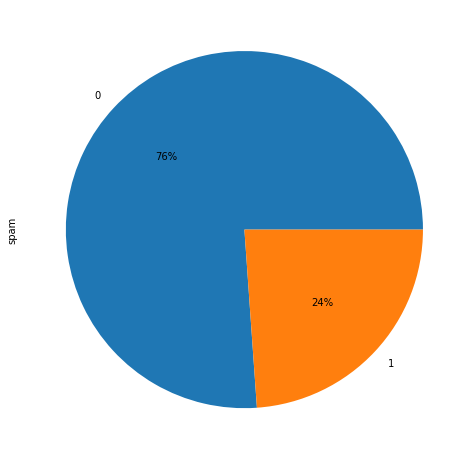

In [5]:
#inreasing default figure size
plt.rcParams["figure.figsize"] = [8,10] 

#plotting pieplot for spam and ham email messages
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
#importing english stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

#removing stopwords from email messages
message_dataset['text_without_sw'] = message_dataset['text'] .apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

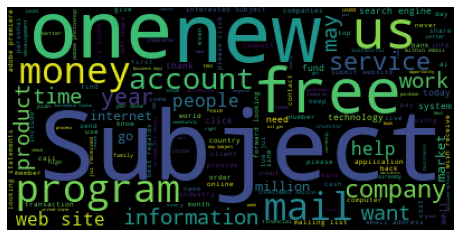

In [7]:
#filtering spam messages
message_dataset_spam = message_dataset[message_dataset["spam"] == 1]

#increase figure size
plt.rcParams["figure.figsize"] = [8,10] 

#joining words in the dataset containing spam messages
text = ' '.join(message_dataset_spam['text_without_sw'])

#generating word cloud using spam messages
wordcloud2 = WordCloud().generate(text)

#plotting word cloud
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

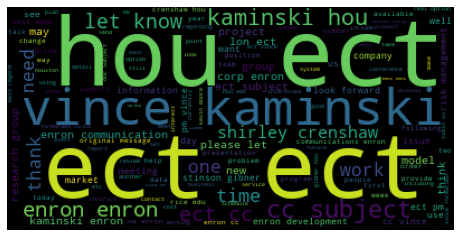

In [8]:
#filtering non-spam messages
message_dataset_ham = message_dataset[message_dataset["spam"] == 0]

#increase figure size
plt.rcParams["figure.figsize"] = [8,10] 

#joining words in the dataset containing non-spam messages
text = ' '.join(message_dataset_ham['text_without_sw'])

#generating word cloud using non-spam messages
wordcloud2 = WordCloud().generate(text)

#plotting word cloud
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## 10.2.5. Cleaning the Data

In [9]:
#creating feature set
X = message_dataset["text"]

#creating label set
y = message_dataset["spam"]


In [10]:
#cleaning feature set (email messages)
def clean_text(doc):

    #removing everything except capital and small letters
    document = re.sub('[^a-zA-Z]', ' ', doc)
    
    #removing single characters
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    #removing multiple empty spaces
    document = re.sub(r'\s+', ' ', document)

    return document


In [11]:
X_sentences = []

#creating list of sentences
reviews = list(X)

#cleaning all sentences using clean_text() function
for rev in reviews:
    X_sentences.append(clean_text(rev))

## 10.2.6. Converting Text to Numbers

In [12]:
#importing stopwords and TFIDF vectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#converting email messages to text via TFIDF vectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

## 10.2.7. Training the Model

In [13]:
#dividing the data into the training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
#training Naive Bayes algorithm on the training data
spam_detector = MultinomialNB()
spam_detector.fit(X_train, y_train)

MultinomialNB()

## 10.2.8. Evaluating Model Performance

In [15]:
#making predictions on the test set
y_pred = spam_detector.predict(X_test)

In [16]:
#evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[849   7]
 [ 18 272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.97      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

0.9781849912739965


## 10.2.9. Making Prediction on Single Instance

In [17]:
#printing sentence at index 56 in the dataset
print(X_sentences[56])

#print label for the sentence at the index 56
print(y[56])

Subject localized software all languages available hello we would like to offer localized software versions german french spanish uk and many others aii iisted software is available for immediate downioad no need to wait week for cd deiivery just few exampies norton lnternet security pro windows xp professionai with sp fuil version corei draw graphics suite dreamweaver mx homesite inciudinq macromedia studio mx just browse our site and find any software you need in your native ianguaqe best reqards kayieen 
1


In [18]:
#making prediction for the label for the sentence at index 56
print(spam_detector.predict(vectorizer.transform([X_sentences[56]])))

[1]
